## Stat graphs


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import sys
sys.path.insert(0, 'G:/work/GitHub/ml_baseline_things/functions/')
import supportFunctions as sf
import featureEngineringFunctions as fef

dirPath = '2-featuresPack/'

In [10]:
np.power(2, 14)

16384

In [3]:
trainVStest = 891

## In general

In [30]:
#features_from_other = ['Survived','Pclass','Sex','Family_Size','Family_Survival','Fare_Bin','Age_Bin']
featureList = [
#'PassengerId',
#'Survived',
'AGE_cont',
'AgeBin_LE',
'Age-Class_cont',
'Deck_LE',
#'Deck_OHE',
'FamilySize_LE',
#'FamilySurvival_bin',
'Fare_cont',
'FareBin_LE',
#'HasBloodRelatives_LE',
'HasWifeHasb_LE',
'IsAlone_LE',
'Parch_LE',
'Pclass_LE',
'Sex_LE',
#'Sex_OHE',
'SibSp_LE',
'Title_LE',
#'Title_OHE',
'FamilySurvival_bin'
]
dataAll = fef.create_dataset_from_features (featureList, dirPath)
#dataAll.head()
dataTrain = dataAll[:trainVStest]
dataTest = dataAll[trainVStest:]
dataAll.isnull().sum()

## check if data on train looks like test, visual

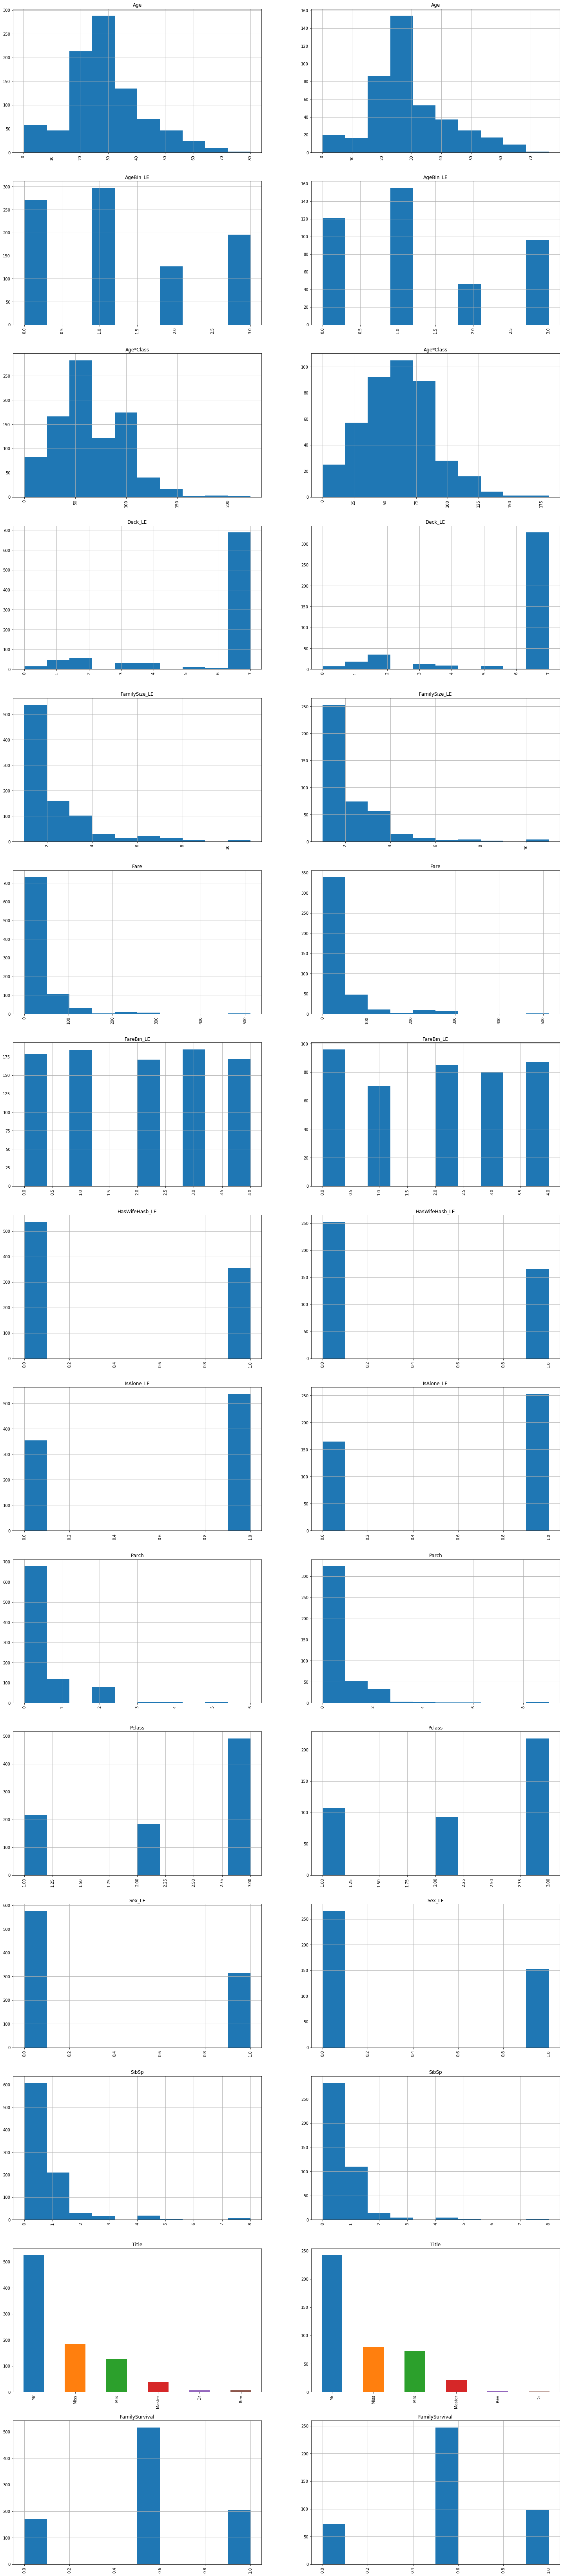

In [59]:
fig = plt.figure(figsize=(25, 120))
cols = 2
rows = np.ceil(2* float(dataAll.shape[1]) / cols)
i = 0
for n, column in enumerate(dataset.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if dataTrain.dtypes[column] == np.object:
        dataTrain[column].value_counts().plot(kind="bar", axes=ax)
    else:
        dataTrain[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
    i+=1
    
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if dataTest.dtypes[column] == np.object:
        dataTest[column].value_counts().plot(kind="bar", axes=ax)
    else:
        dataTest[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
    i+=1

#plt.subplots_adjust(hspace=0.9, wspace=0.2)


## Check normal distributions of columns

In [89]:

from scipy import stats
np.random.seed(12345678)
x = stats.norm.rvs(loc=5, scale=8, size=100)
stats.shapiro(x)


(0.9772801399230957, 0.08143486827611923)

In [92]:
stats.shapiro(dataTrain.Age.values)

(0.969180166721344, 8.674758502670576e-13)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(dataTrain[['Age', 'Pclass']])
#dataTrain[['Age', 'Pclass']]
sc[:,:1]#[:1]
stats.shapiro(sc[:,:1])

(0.969179630279541, 8.671933071809079e-13)